# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns
numeric_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

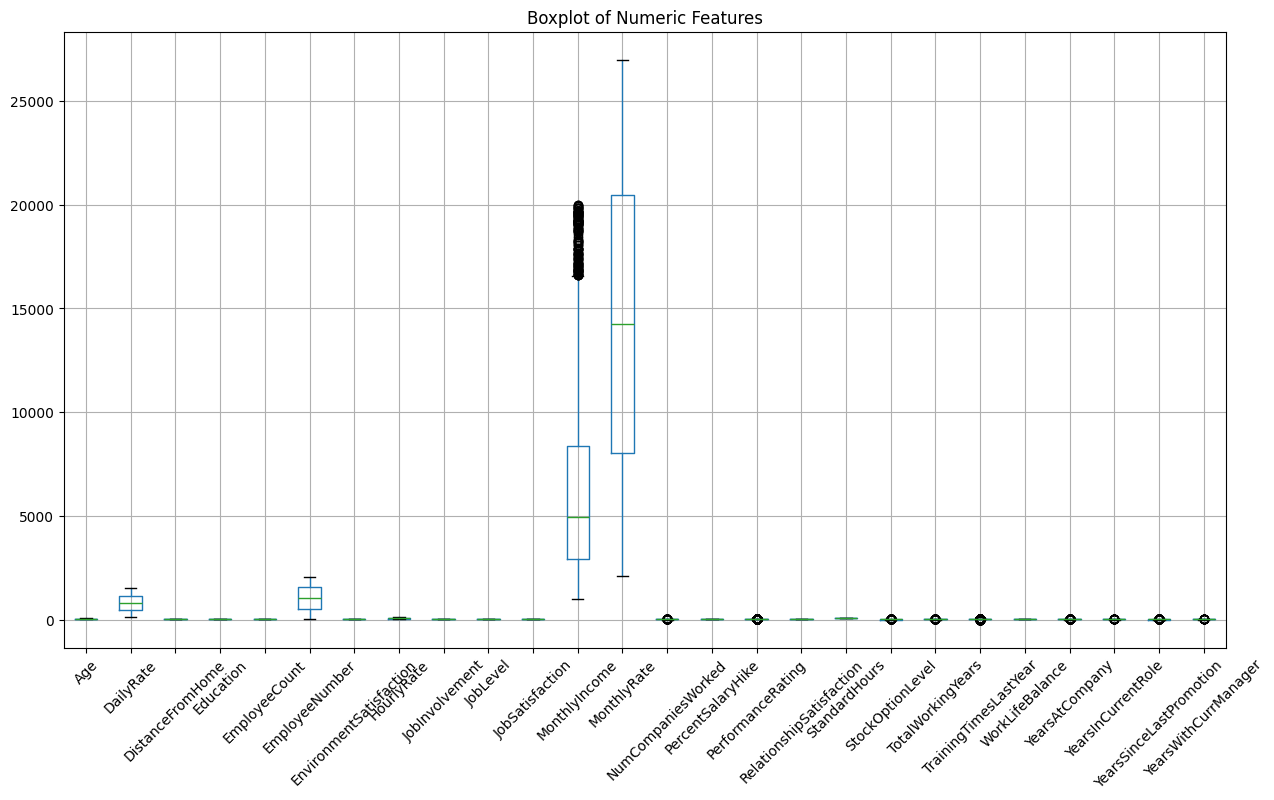

In [6]:
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

In [7]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


# EDA 

In [8]:
df_eda = df.copy()

In [9]:
df_eda.info()
df_eda.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df_eda["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
df_eda.describe()
cat_cols = df_eda.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"{col}: {df_eda[col].nunique()} unique values -> {df_eda[col].unique()[:10]}")

Attrition: 2 unique values -> ['Yes' 'No']
BusinessTravel: 3 unique values -> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: 3 unique values -> ['Sales' 'Research & Development' 'Human Resources']
EducationField: 6 unique values -> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: 2 unique values -> ['Female' 'Male']
JobRole: 9 unique values -> ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: 3 unique values -> ['Single' 'Married' 'Divorced']
Over18: 1 unique values -> ['Y']
OverTime: 2 unique values -> ['Yes' 'No']


In [12]:
obj_cols = df_eda.select_dtypes(include=["object"]).columns
df_eda[obj_cols] = df_eda[obj_cols].astype("category")

duplicates = df_eda.duplicated().sum()
print("Duplicate rows:", duplicates)
if duplicates > 0:
    df_eda = df_eda.drop_duplicates()

single_val_cols = [col for col in df_eda.columns if df_eda[col].nunique() == 1]
print("Columns with only one unique value:", single_val_cols)

df_eda.drop(columns=single_val_cols, inplace=True)

print("\nAge range:", df_eda["Age"].min(), "-", df_eda["Age"].max())
print("DistanceFromHome range:", df_eda["DistanceFromHome"].min(), "-", df_eda["DistanceFromHome"].max())
print("MonthlyIncome range:", df_eda["MonthlyIncome"].min(), "-", df_eda["MonthlyIncome"].max())

invalid_rows = df_eda[df_eda["YearsAtCompany"] > (df_eda["Age"] - 16)]
print("Suspicious rows where YearsAtCompany > Age - 16:", len(invalid_rows))

df_eda.to_csv("HR_Employee_Attrition_Cleaned.csv", index=False)
print("Cleaned dataset")

Duplicate rows: 0
Columns with only one unique value: ['EmployeeCount', 'Over18', 'StandardHours']

Age range: 18 - 60
DistanceFromHome range: 1 - 29
MonthlyIncome range: 1009 - 19999
Suspicious rows where YearsAtCompany > Age - 16: 0


Cleaned dataset


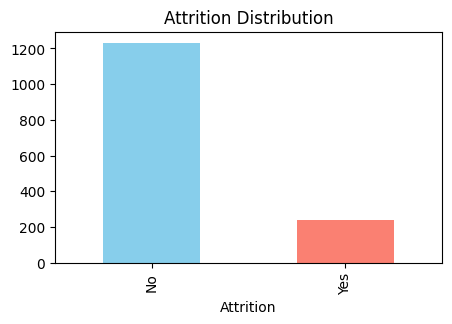

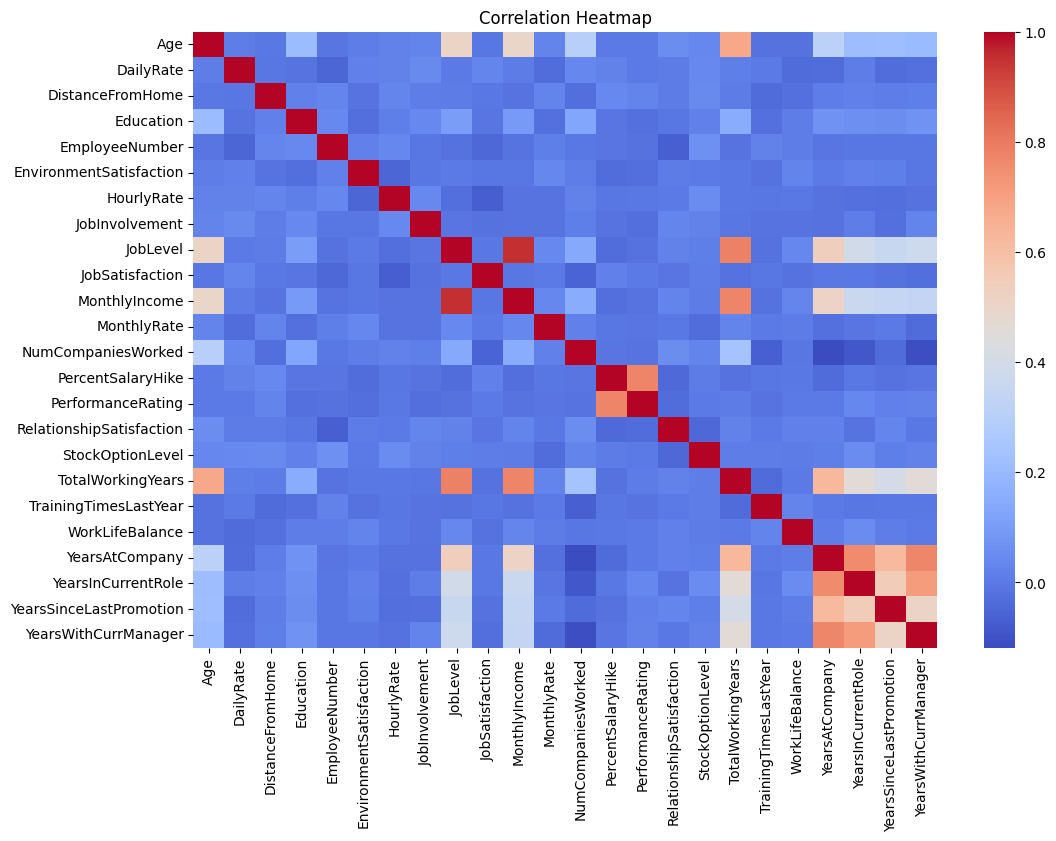

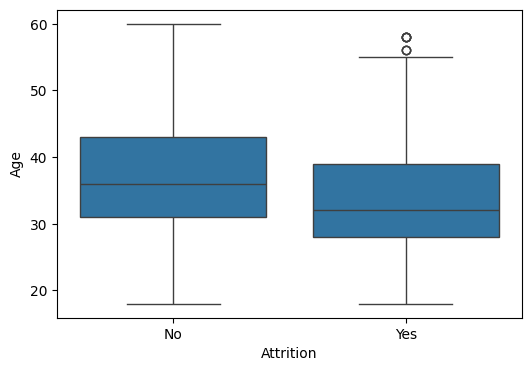

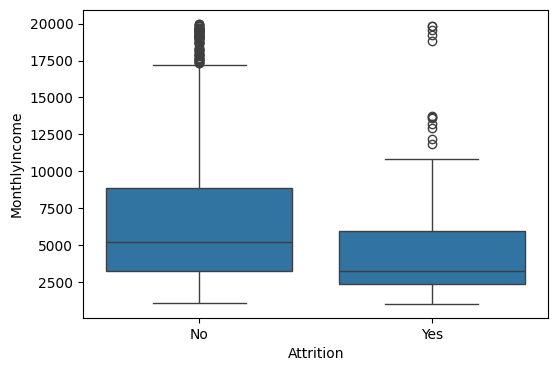

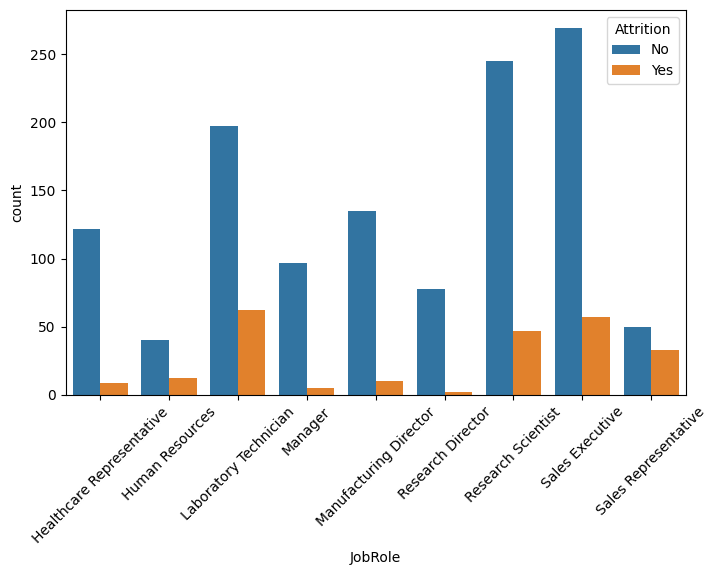

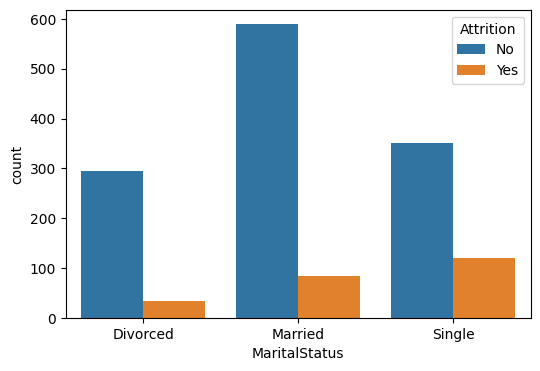

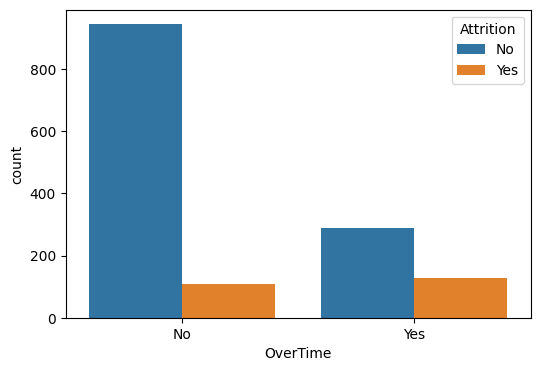

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df_eda.select_dtypes(include=["category"]).columns
num_cols = df_eda.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(5,3))
df_eda["Attrition"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Attrition Distribution")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df_eda[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="Age", data=df_eda)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_eda)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="JobRole", hue="Attrition", data=df_eda)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df_eda)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df_eda)
plt.show()

Outliers detected: {'MonthlyIncome': np.int64(114), 'NumCompaniesWorked': np.int64(52), 'PerformanceRating': np.int64(226), 'StockOptionLevel': np.int64(85), 'TotalWorkingYears': np.int64(63), 'TrainingTimesLastYear': np.int64(238), 'YearsAtCompany': np.int64(104), 'YearsInCurrentRole': np.int64(21), 'YearsSinceLastPromotion': np.int64(107), 'YearsWithCurrManager': np.int64(14)}
Outliers were identified using the IQR method. No extreme removal was done since values are within realistic business limits and important for analysis.


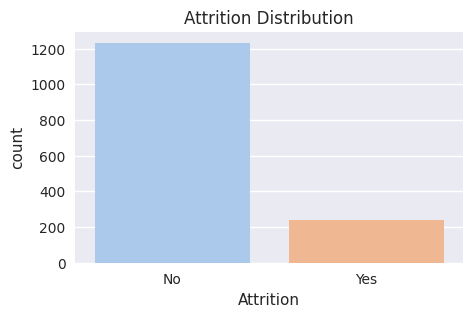

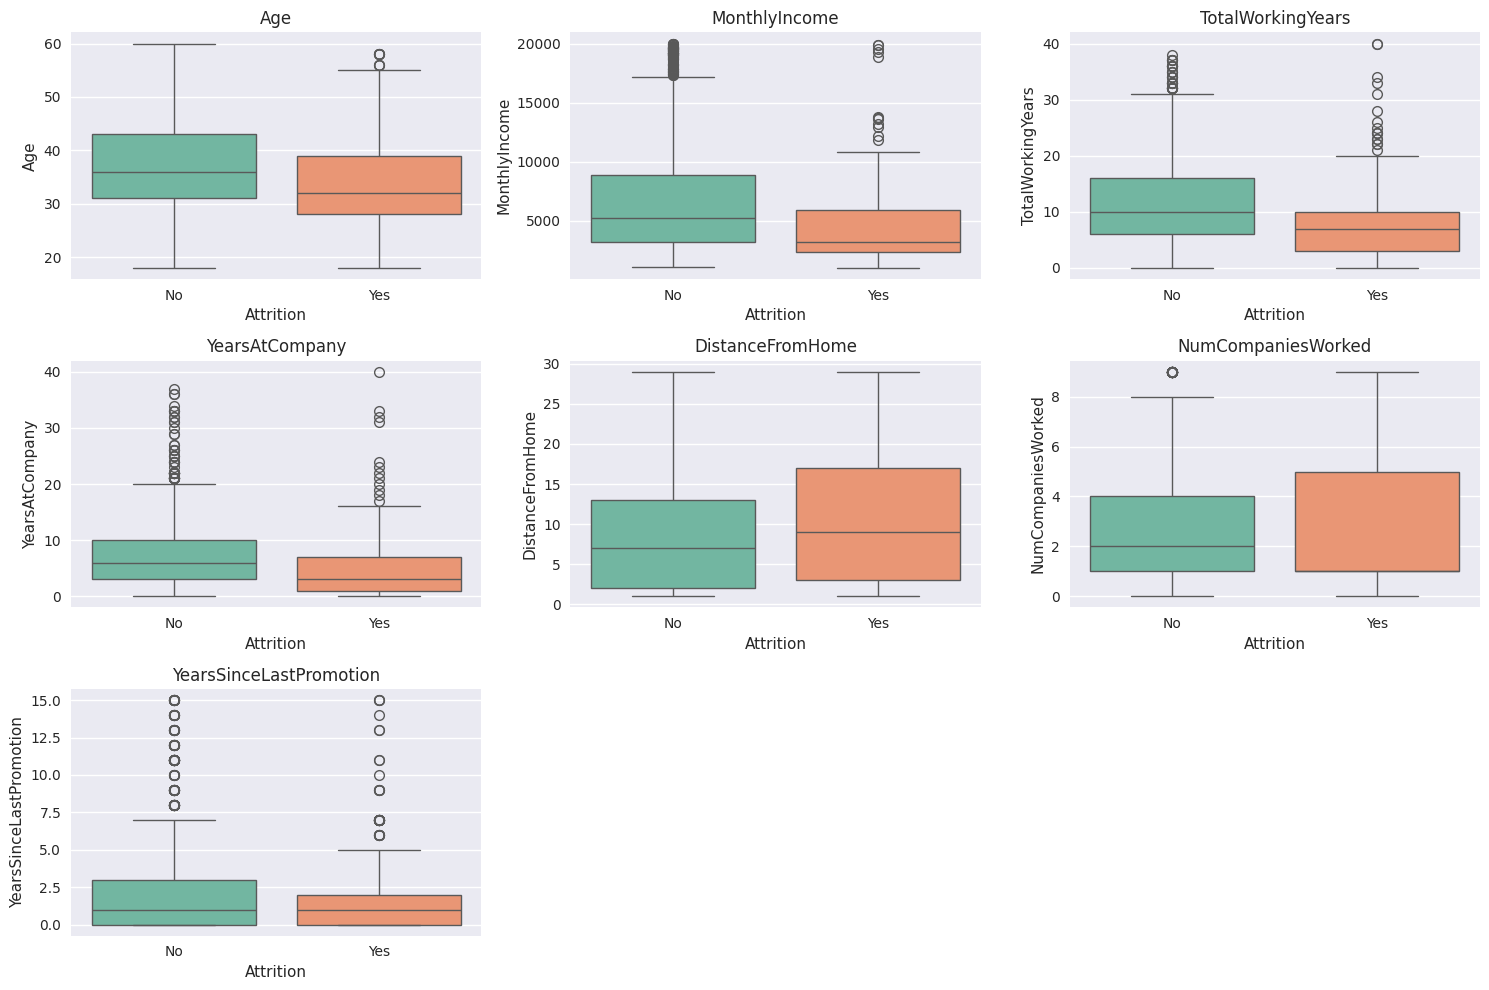

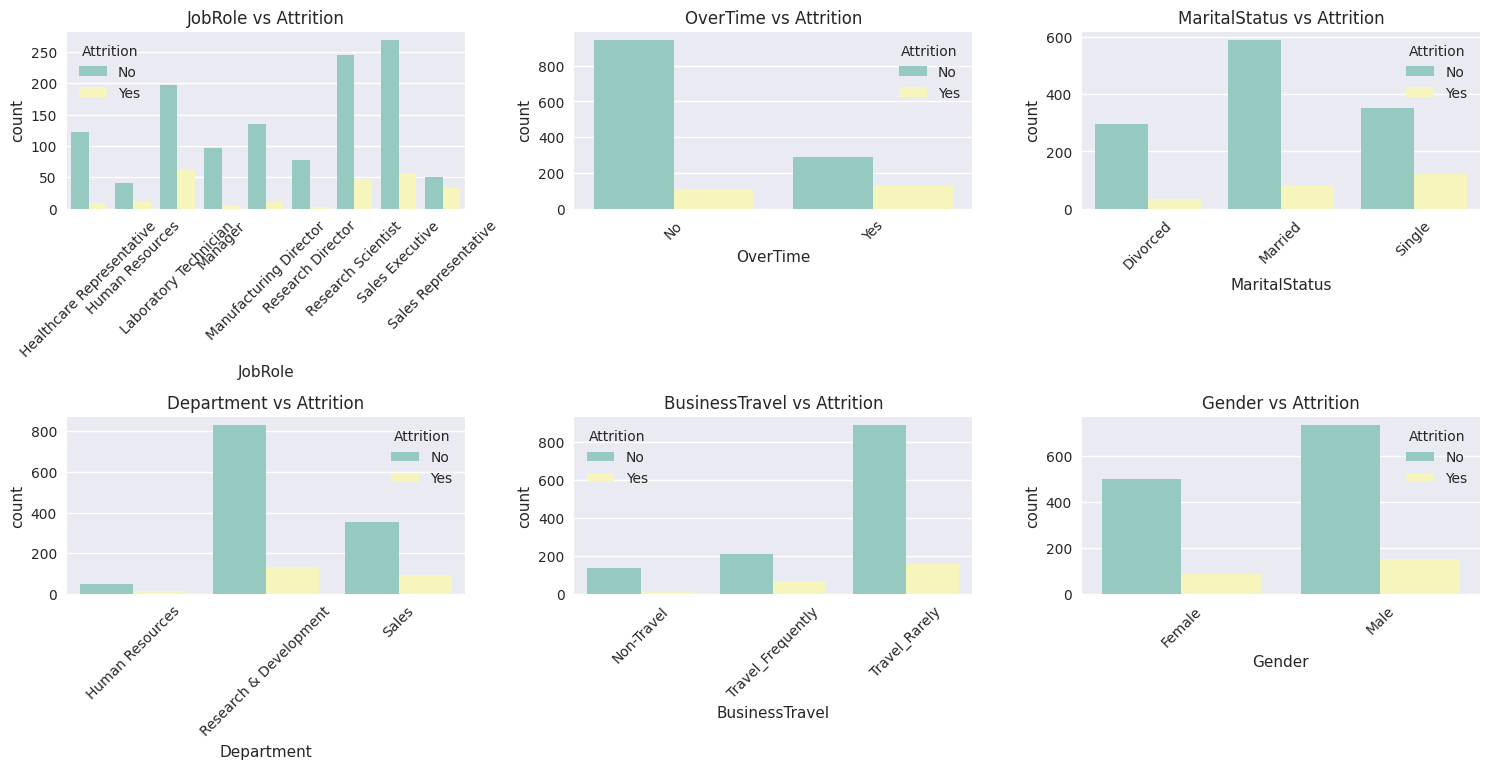

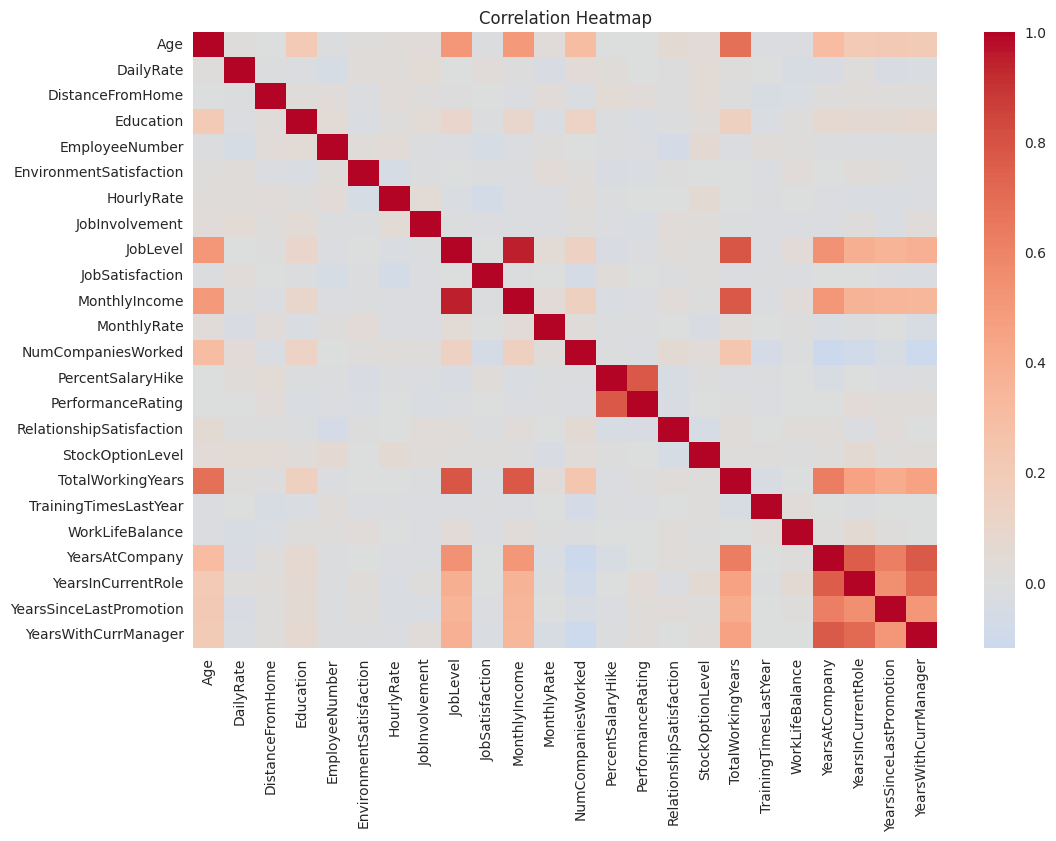

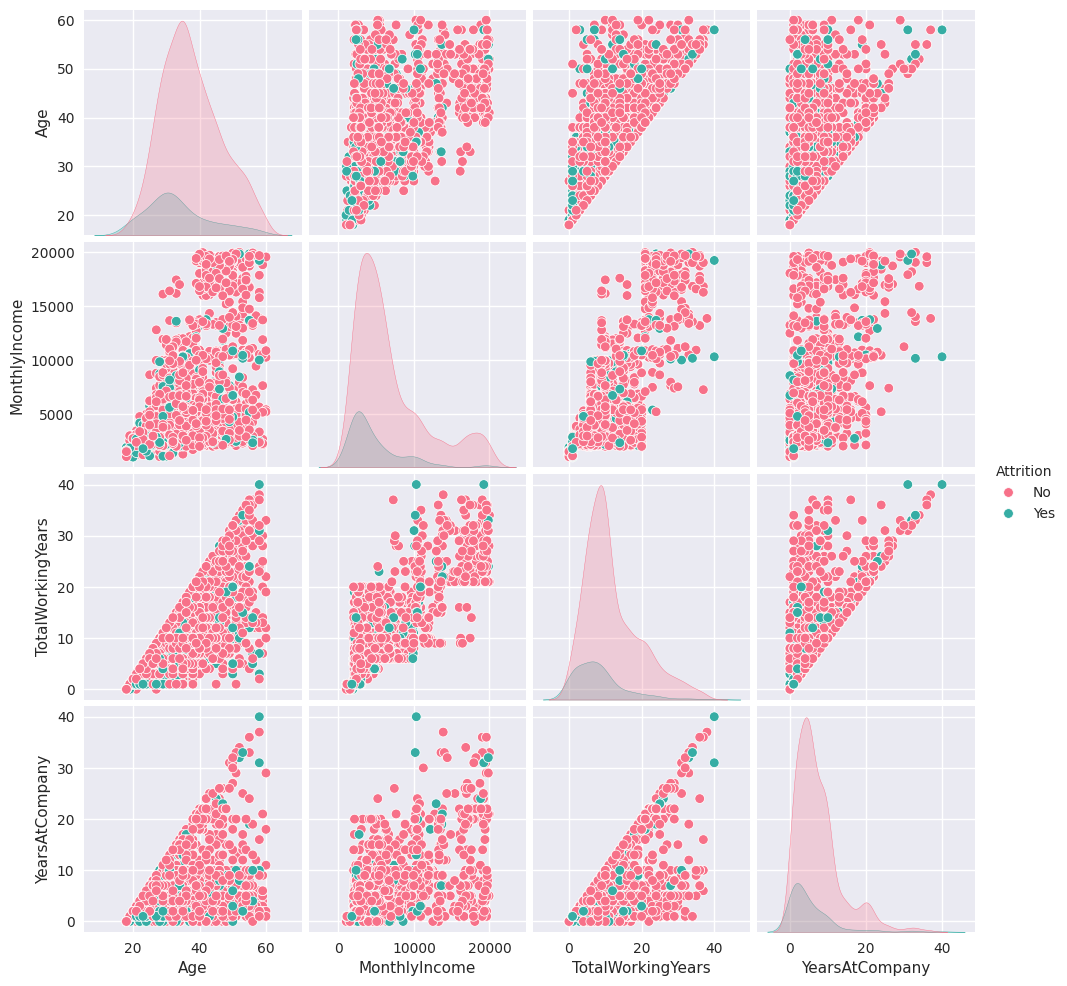

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")

num_cols = df_eda.select_dtypes(include=["int64", "float64"]).columns
outlier_summary = {}
for col in num_cols:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_eda[col] < lower) | (df_eda[col] > upper)).sum()
    outlier_summary[col] = outliers
outlier_summary = {k:v for k,v in outlier_summary.items() if v>0}
print("Outliers detected:", outlier_summary)
print("Outliers were identified using the IQR method. No extreme removal was done since values are within realistic business limits and important for analysis.")

plt.figure(figsize=(5,3))
sns.countplot(x="Attrition", hue="Attrition", data=df_eda, palette="pastel", legend=False)
plt.title("Attrition Distribution")
plt.show()

key_features = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany",
                "DistanceFromHome", "NumCompaniesWorked", "YearsSinceLastPromotion"]
plt.figure(figsize=(15,10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x="Attrition", y=col, hue="Attrition", data=df_eda, palette="Set2", legend=False)
    plt.title(col)
plt.tight_layout()
plt.show()

cat_cols = ["JobRole", "OverTime", "MaritalStatus", "Department", "BusinessTravel", "Gender"]
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, hue="Attrition", data=df_eda, palette="Set3")
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df_eda[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df_eda[["Age","MonthlyIncome","TotalWorkingYears","YearsAtCompany","Attrition"]],
             hue="Attrition", diag_kind="kde", palette="husl")
plt.show()


# Preparing data for model

In [15]:
df_model = df.copy()

In [16]:
import numpy as np

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    

    df[column] = np.where(df[column] < lower_limit, lower_limit, np.where(df[column] > upper_limit, upper_limit, df[column]))


In [17]:
cols_with_outliers = [
    'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

for col in cols_with_outliers:
    cap_outliers(df_model, col)


In [18]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [19]:
df_model.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [20]:
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [21]:
numeric_cols = df_model.select_dtypes(include = ['int64', 'float64']).columns
numeric_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe  = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False,
    drop='first'
).set_output(transform = 'pandas')
df_encoded = ohe.fit_transform(df_model[categorical_cols])
df_model = pd.concat([df_model[numeric_cols], df_encoded], axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])


In [24]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EnvironmentSatisfaction            1470 non-null   float64
 5   HourlyRate                         1470 non-null   float64
 6   JobInvolvement                     1470 non-null   float64
 7   JobLevel                           1470 non-null   float64
 8   JobSatisfaction                    1470 non-null   float64
 9   MonthlyIncome                      1470 non-null   float64
 10  MonthlyRate                        1470 non-null   float64
 11  NumCompaniesWorked                 1470 non-null   float

In [25]:
y = df_model['Attrition_Yes']
X = df_model.drop('Attrition_Yes', axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2 , random_state = 42 , stratify = y )
X_train , x_cv , y_train , y_cv = train_test_split( X_train , y_train , test_size = 0.25 , random_state = 42 , stratify = y_train )

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(x_cv)
print(accuracy_score(y_cv, y_pred))

0.8945578231292517


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100, 
    max_depth = 5,
    random_state=42, 
    bootstrap=True
)

rf.fit(X_train, y_train)

y_pred = rf.predict(x_cv)
print(accuracy_score(y_cv, y_pred))

0.8605442176870748


# XGBoost

In [29]:
!pip install -q xgboost

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(x_cv)
print(accuracy_score(y_cv, y_pred))

0.8639455782312925


# Support Vector Machine

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(x_cv)
print(accuracy_score(y_cv, y_pred))


0.8639455782312925


# Performace Comparison

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [33]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Support Vector Machine": svm
}

results = {}

metrics_dict = {"Accuracy": {}, "Precision": {}, "Recall": {}, "F1-score": {}}
conf_matrices = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics_dict["Accuracy"][name] = accuracy_score(y_test, y_pred)
    metrics_dict["Precision"][name] = precision_score(y_test, y_pred, average='weighted')
    metrics_dict["Recall"][name] = recall_score(y_test, y_pred, average='weighted')
    metrics_dict["F1-score"][name] = f1_score(y_test, y_pred, average='weighted')
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

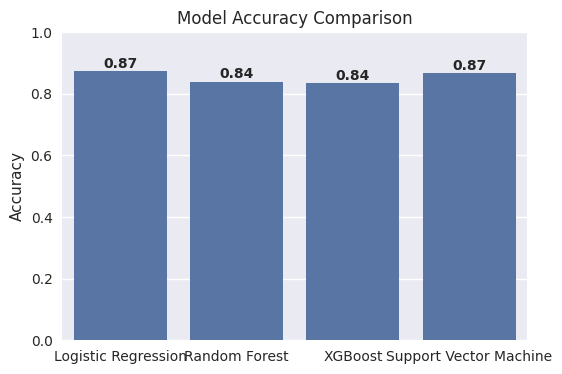

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_dict["Accuracy"].keys()), y=list(metrics_dict["Accuracy"].values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(metrics_dict["Accuracy"].values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [35]:
metrics_dict["Accuracy"]

{'Logistic Regression': 0.8741496598639455,
 'Random Forest': 0.8401360544217688,
 'XGBoost': 0.8367346938775511,
 'Support Vector Machine': 0.8673469387755102}

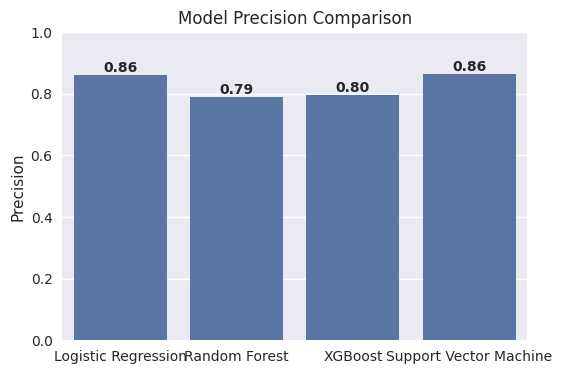

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_dict["Precision"].keys()), y=list(metrics_dict["Precision"].values()))
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.ylim(0,1)
for i, v in enumerate(metrics_dict["Precision"].values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [37]:
metrics_dict["Precision"]

{'Logistic Regression': 0.8600245653817082,
 'Random Forest': 0.7897020877316444,
 'XGBoost': 0.7970798427674319,
 'Support Vector Machine': 0.8631253920007719}

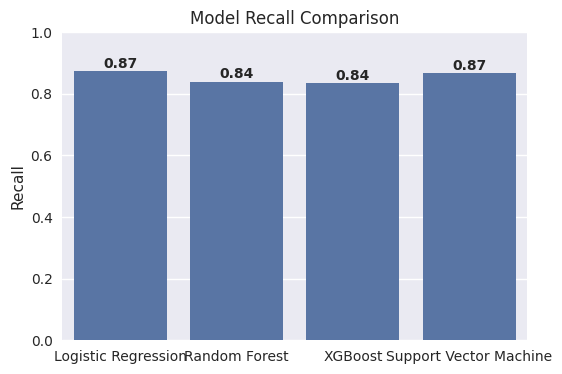

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_dict["Recall"].keys()), y=list(metrics_dict["Recall"].values()))
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.ylim(0,1)
for i, v in enumerate(metrics_dict["Recall"].values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [39]:
metrics_dict["Recall"]

{'Logistic Regression': 0.8741496598639455,
 'Random Forest': 0.8401360544217688,
 'XGBoost': 0.8367346938775511,
 'Support Vector Machine': 0.8673469387755102}

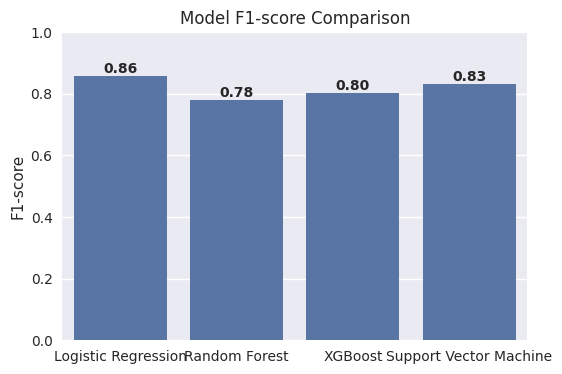

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_dict["F1-score"].keys()), y=list(metrics_dict["F1-score"].values()))
plt.title("Model F1-score Comparison")
plt.ylabel("F1-score")
plt.ylim(0,1)
for i, v in enumerate(metrics_dict["F1-score"].values()):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [41]:
metrics_dict["F1-score"]

{'Logistic Regression': 0.8565648287811051,
 'Random Forest': 0.7791429420930384,
 'XGBoost': 0.8031430129303629,
 'Support Vector Machine': 0.8323890255855634}

In [42]:
for name, cm in conf_matrices.items():
    print(f"Confusion Matrix for {name}:")
    print(conf_matrices[name])

Confusion Matrix for Logistic Regression:
[[240   7]
 [ 30  17]]
Confusion Matrix for Random Forest:
[[245   2]
 [ 45   2]]
Confusion Matrix for XGBoost:
[[238   9]
 [ 39   8]]
Confusion Matrix for Support Vector Machine:
[[245   2]
 [ 37  10]]
